## 1. Downloading and getting dataset from kaggle
[blog link](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command
%pwd

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

In [5]:
!kaggle datasets download -d deadskull7/fer2013
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

 99% 96.0M/96.6M [00:03<00:00, 29.4MB/s]
100% 96.6M/96.6M [00:03<00:00, 30.9MB/s]
Archive:  fer2013.zip
  inflating: fer2013.csv             


## 2. Reading and exploring dataset

In [6]:
!ls

fer2013.csv  kaggle.json


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('fer2013.csv')
print(df.head())
print("shape= ",df.shape)

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
shape=  (35887, 3)


In [9]:
print("Sample data usage: \n",df.Usage.value_counts())

Sample data usage: 
 Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


In [10]:
print('sample per emotion: ')
print(df.emotion.value_counts())

sample per emotion: 
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [11]:
print('Number of pixels for a sample:')
print(len(df.pixels[0].split(' ')))

Number of pixels for a sample:
2304


In [12]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(emotion_labels)
num_classes

7

Surprise


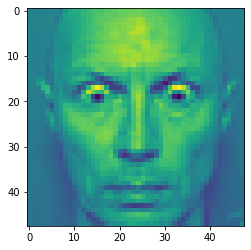

In [13]:
# visualize using the pixel entry
sample_number = 15

import matplotlib.pyplot as plt

array = np.mat(df.pixels[sample_number]).reshape(48,48)
plt.imshow(array)
print(emotion_labels[df.emotion[sample_number]])

## 3. Preprocessing data

In [14]:
train_set = df[(df.Usage == 'Training')]
validation_set = df[(df.Usage == 'PublicTest')]
test_set = df[(df.Usage == 'PrivateTest')]

In [15]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(emotion_labels)

In [16]:
from math import sqrt
depth = 1
height = int(sqrt(len(df.pixels[0].split())))
width = height

In [17]:
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32)
X_validation = np.array(list(map(str.split, validation_set.pixels)), np.float32)
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32)

num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_test, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)

Training:  (28709, 48, 48, 1)
Validation:  (3589, 48, 48, 1)
Test:  (3589, 48, 48, 1)


In [18]:
# one hot encoding the seven emotions 
from keras.utils import np_utils

y_train = train_set.emotion
y_train = np_utils.to_categorical(y_train, num_classes)

y_validation = validation_set.emotion
y_validation = np_utils.to_categorical(y_validation, num_classes)

y_test = test_set.emotion
y_test = np_utils.to_categorical(y_test, num_classes)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)

Training:  (28709, 7)
Validation:  (3589, 7)
Test:  (3589, 7)


In [19]:
y_train[21]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

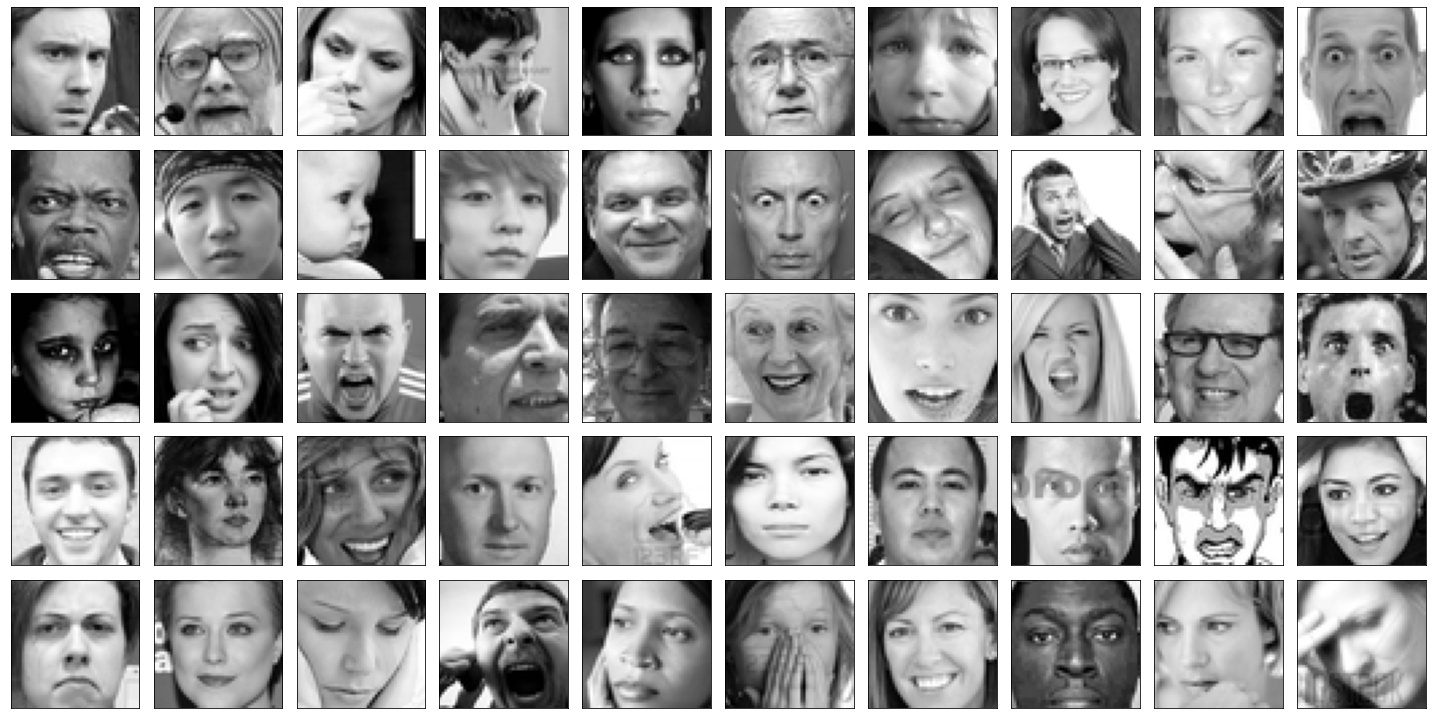

In [20]:
import matplotlib
import matplotlib.pyplot as plt

def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(10,10,i+1)
        ax.imshow(input_img[0,:,:,0],cmap=matplotlib.cm.gray )
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,50, X_train)

## 4. Building Neural Networks

In [21]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        12352     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       2

## 5. Training the model

In [24]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,   # randomly flip images
    )


datagen.fit(X_train)
datagen.fit(X_validation)

In [25]:
batch_size = 32
num_epochs = 25

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath='Model.{epoch:02d}-{val_acc:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

from keras import backend as K

def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 1

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=[fbeta, 'acc'])

In [28]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size)
validation_flow = datagen.flow(X_validation, y_validation)

In [29]:
%%time
history = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=validation_flow, 
                    validation_steps=len(X_validation) / batch_size,
                    callbacks=[checkpointer, reduce_lr, checkpointer])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
897/897 [==============================] - 49s 20ms/step - loss: 1.8619 - fbeta: 0.0825 - acc: 0.2806 - val_loss: 2.0483 - val_fbeta: 0.0527 - val_acc: 0.2184

Epoch 00001: saving model to Model.01-0.2184.hdf5

Epoch 00001: saving model to Model.01-0.2184.hdf5
Epoch 2/25
897/897 [==============================] - 17s 19ms/step - loss: 1.4236 - fbeta: 0.2332 - acc: 0.4546 - val_loss: 1.4021 - val_fbeta: 0.2082 - val_acc: 0.4687

Epoch 00002: saving model to Model.02-0.4687.hdf5

Epoch 00002: saving model to Model.02-0.4687.hdf5
Epoch 3/25
897/897 [==============================] - 17s 19ms/step - loss: 1.3021 - fbeta: 0.2860 - acc: 0.4998 - val_loss: 1.2586 - val_fbeta: 0.3525 - val_acc: 0.5294

Epoch 00003: saving model to Model.03-0.5294.hdf5

Epoch 00003: saving model to Model.03-0.5294.hdf5
Epoch 4/25
897/897 [==============================] - 17s 19ms/step - loss: 1.2320 - fbeta: 0.3227 - acc: 0.5272 - val_loss: 1.1857 - val_fbeta: 0.3747 - val_acc: 0.5444

Epoch 00004: 

## 6. Evaluation

In [30]:
score = model.evaluate(X_test, y_test, steps=len(X_test) / batch_size)
print('Evaluation loss: ', score[0])
print('Evaluation accuracy: ', score[1])

112/112 [==============================] - 1s 7ms/step - loss: 0.9583 - fbeta: 0.5398 - acc: 0.6397
Evaluation loss:  0.9582700729370117
Evaluation accuracy:  0.5397677421569824


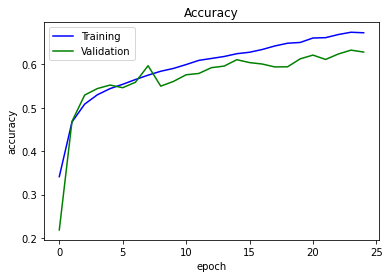

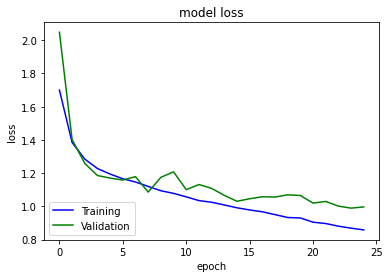

In [31]:
# summarize history for accuracy
plt.plot(history.history['acc'], color='b', label='Training')
plt.plot(history.history['val_acc'], color='g', label='Validation')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], color='g', label='Validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower left')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[Text(58.5, 0.5, 'True label'), Text(0.5, 58.5, 'Predicted label')]

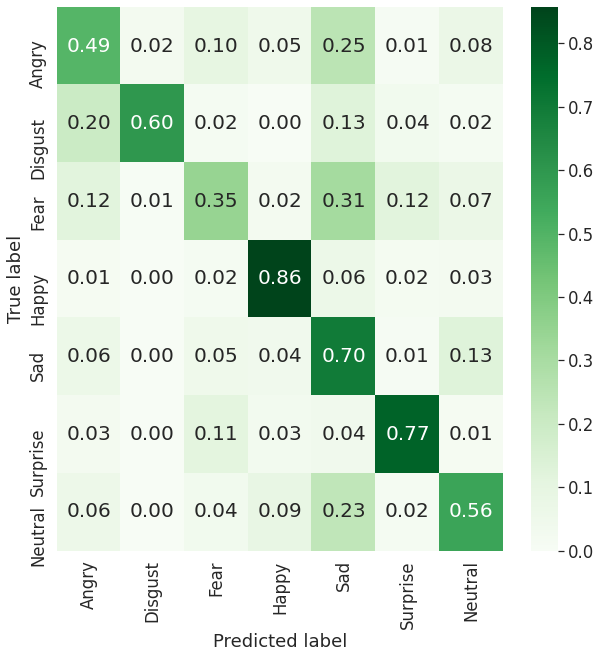

In [32]:
y_pred = model.predict_classes(X_test)
y_true = np.asarray([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                    cmap="Greens", yticklabels=emotion_labels, xticklabels=emotion_labels, vmin=0, vmax=np.max(cm_normalised), 
                    fmt=".2f", annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

## 7. Saving the model

In [33]:
model_json = model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

model.save('weights.h5')